#import

In [ ]:
import numpy as np
import matplotlib.pylab as plt

!pip install git+https://github.com/mattbellis/h5hep.git
import h5hep

!pip install git+https://github.com/mattbellis/particle_physics_simplified.git
import pps_tools as pps


In [ ]:
# Download the dataset
# from
# https://github.com/particle-physics-playground/playground/tree/master/data
#  ~~~~~~~~~~~~~~~~ #

pps.download_from_drive('dimuons_100k.hdf5')
infile = 'data/dimuons_100k.hdf5'

#build colisions

In [ ]:
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)
print(len(collisions), " collisions")  # This line is optional, and simply tells you how many events are in the file.


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000
100000  collisions


In [ ]:
second_collision = collisions[1]   # the second event
print("First event: ",second_collision)
all_muons = second_collision['muons']    # all of the jets in the first event
print("All muons: ",all_muons)
first_muon = all_muons[0]    # the first jet in the first event
print("First muon: ",first_muon)   
muon_energy = first_muon['e']      # the energy of the first photon
print("First muon's energy: ",muon_energy)

First event:  {'jets': [], 'muons': [{'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}, {'e': 11.8636, 'px': 4.78984, 'py': -6.26222, 'pz': -8.86434, 'q': 1}], 'electrons': [], 'photons': [], 'METx': 0.0, 'METy': 0.0}
All muons:  [{'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}, {'e': 11.8636, 'px': 4.78984, 'py': -6.26222, 'pz': -8.86434, 'q': 1}]
First muon:  {'e': 12.9435, 'px': 5.12579, 'py': -3.98369, 'pz': -11.1973, 'q': -1}
First muon's energy:  12.9435


In [ ]:
energies = []

for collision in collisions:          # loops over all the events in the file
  muons = collision['muons']      # gets the list of all muons in the event
  
  for muon in muons:           # loops over each muon in the current event
    e = muon['e']                # gets the energy of the muon
    
    energies.append(e)             # puts the energy in a list

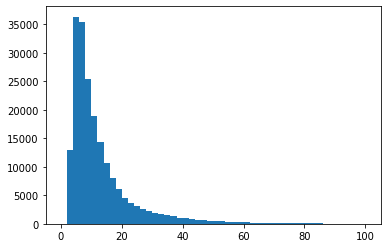

In [ ]:
#plot first energies in a histogram 
plt.hist(energies,bins=50,range=(0,100));

In [ ]:
alldata = pps.get_all_data(infile,verbose=False)
nentries = pps.get_number_of_entries(alldata)

print("# entries: ",nentries)   # This optional line tells you how many events are in the file


Loading in the data...

Building the indices...
Built the indices!
Data is read in and input file is closed.
# entries:  100000


In [ ]:
for entry in range(nentries):      # This range will loop over ALL of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')

for entry in range(0,int(nentries/2)):     # This range will loop over the first half of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')
    
for entry in range(int(nentries/2),nentries):      # This range will loop over the second half of the events
    collision = pps.get_collision(alldata,entry_number=entry,experiment='CMS')

In [ ]:
#second energies in a histogram 

energies = []

for event in range(0,int(nentries/3)):        # Loops over first 3rd of all events
  collision = pps.get_collision(alldata,entry_number=event,experiment='CMS')    # organizes the data so you can interface with it
  muons = collision['muons']         # gets the list of all photons in the current event
  
  for muon in muons:                 # loops over all photons in the event
    e = muon['e']                      # gets the energy of the photon
    
    energies.append(e)                   # adds the energy to a list

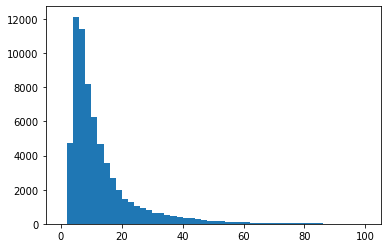

In [ ]:
plt.hist(energies,bins=50,range=(0,100));